
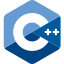
<br>

<div style="text-align:center; font-size:200%;">
  <b>The Two-Loop TDD Cycle</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 02 The Two-Loop TDD Cycle.ipynb -->
<!-- slides/module_410_unit_testing/topic_158_two_loop_cycle.cpp -->

## Beyond Red-Green-Refactor

- The classic TDD cycle is **tactical**, not **strategic**.
- It doesn't answer:
  - What feature should be built next?
  - How does the current work fit into the big picture?
- Without a guiding context, we can get lost in details that deliver no
  business value ("gold plating").

## The Two-Loop Model (Outside-In TDD)

<img src="img/double-loop.png" alt="Double Loop TDD" style="width: 70%;
  display: block; margin-left: auto; margin-right: auto;"/>

- **Outer Loop (Acceptance Tests):** Defines a feature from the user's
  perspective.
- **Inner Loop (Unit Tests):** Implements the functionality to satisfy the
  acceptance test.

### The Outer Loop: Strategic Guidance

1.  **Write an Acceptance Test:** Formulate a test describing the business or
    user goal.
    - This test is an "executable specification".
    - It will fail because the functionality doesn't exist yet.
    - Forces design decisions about the external interface (e.g., API
      endpoint) from the start.

2.  **Use BDD/ATDD:**
    - **ATDD (Acceptance Test-Driven Development):** Collaborative definition
      of acceptance criteria with the business.
    - **BDD (Behavior-Driven Development):** Use of a structured language
      (e.g., Gherkin) for tests to foster shared understanding.

### The Inner Loop: Tactical Implementation

1.  **Analyze the Failure:** The acceptance test's failure message dictates
    the goal for the first unit test.
    - *Acceptance test fails*: `HTTP 404 Not Found for POST /cart`
    - *Next Step*: Write a unit test for a `CartController`.

2.  **Red-Green-Refactor Cascade:**
    - Write a failing unit test for the `CartController`.
    - Write minimal code to make it pass (e.g., create the controller and
      endpoint).
    - The acceptance test now fails because the controller calls a
      `CartService` that doesn't exist.
    - This new failure prompts the next unit test for the `CartService`.

3.  **Repeat:** This process continues, driving development from the system's
    boundary inward.

## Workshop: A To-Do List Application

**Goal:** We will build a simple in-memory to-do list application using the
two-loop approach.

**Features:**
1. Add a task to a list.
2. View all tasks in the list.
3. Mark a task as completed.

### Step 1: The Outer Loop (Red)

First, we write an acceptance test that describes the entire desired
behavior. This code will not compile because the `Task` and `TodoList`
classes do not exist yet. This is the red state of our outer loop.

In [ ]:
#include <iostream>
#include <string>
#include <vector>
#include <algorithm>
#include "check.h"


This is our high-level acceptance test.
It will not compile until we create the necessary classes and methods.

```cpp
void test_full_todo_list_scenario() {
    // Arrange
    TodoList list;

    // Act 1: Add tasks
    list.add_task("Implement Two-Loop TDD");
    list.add_task("Write workshop slides");

    // Assert 1
    auto tasks1 = list.get_tasks();
    check(tasks1.size() == 2, "Should have 2 tasks after adding");
    check(tasks1[0].description == "Implement Two-Loop TDD", "First task description is wrong");
    check(tasks1[0].completed == false, "New task should not be completed");

    // Act 2: Complete a task
    list.mark_as_complete("Write workshop slides");

    // Assert 2
    auto tasks2 = list.get_tasks();
    auto completed_task = std::find_if(tasks2.begin(), tasks2.end(), [](const Task& task) {
        return task.description == "Write workshop slides";
    });
    check(completed_task != tasks2.end(), "Completed task should be found");
    check(completed_task->completed == true, "Task should be marked as complete");
    std::cout << "Acceptance test passed!\n";
}
```

### Step 2: The Inner Loop (Red-Green-Refactor)

Now, let's focus on the first compilation error. The compiler is likely
complaining about `TodoList`. This is our signal to dive into the inner loop.

**Your Task:**
1.  Write the **very first, smallest unit test** to start the process. A good
    start would be a test that checks if a newly created `TodoList` is empty.
2.  Create the minimal classes (`Task`, `TodoList`) and methods to make this
    first unit test pass.
3.  Work your way through the acceptance test's failures. For each missing
    piece of functionality (e.g., `add_task`, `mark_as_complete`), write a
    new, focused unit test and implement the feature.
4.  Rerun the acceptance test after each inner loop cycle to see your
    progress.